nrmse:  [[0.21643439]]


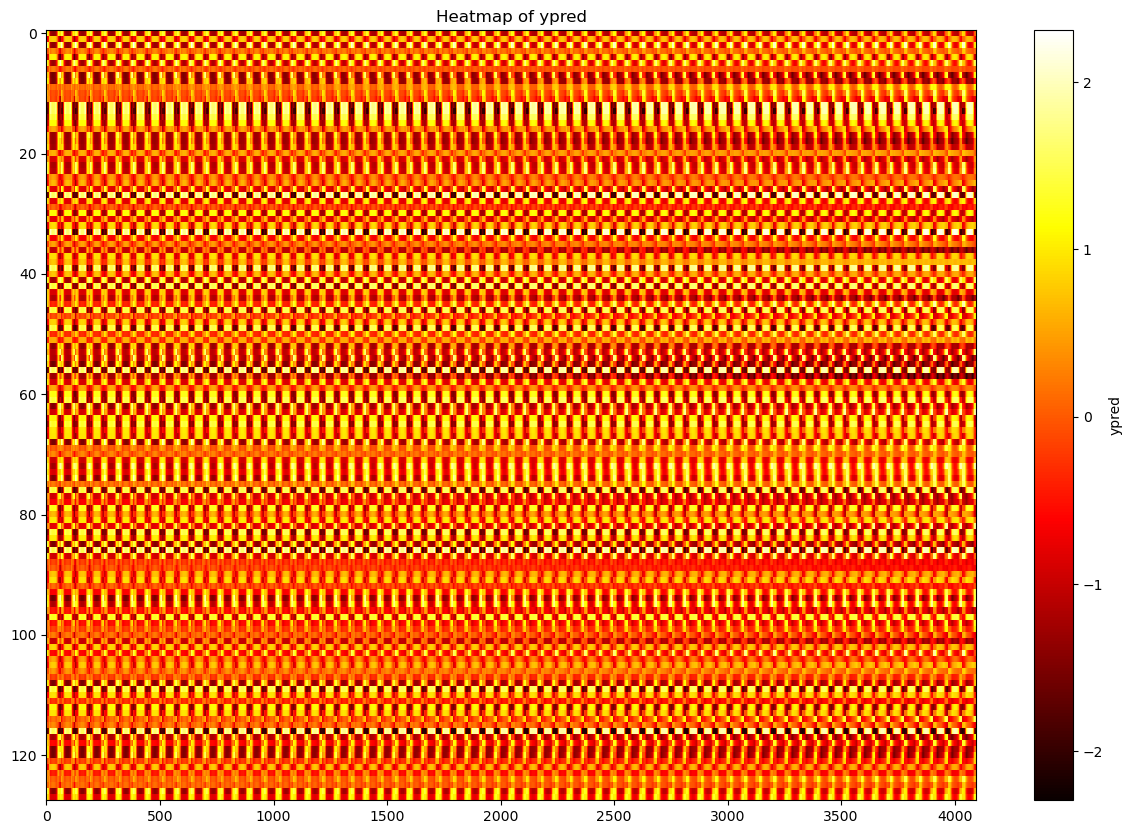

In [8]:
import scipy.io
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('__res_heat__/dc/rank5/fold0/results.mat')

ypred = mat['ypred']
nrmse = mat['nrmse']

print("nrmse: ", nrmse)

plt.figure(figsize=(15, 10)) 
plt.imshow(ypred, cmap='hot', interpolation='nearest', aspect='auto')
plt.colorbar(label='ypred')
plt.title('Heatmap of ypred')
plt.show()
